In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb

import pandas as pd
import numpy as np

In [19]:
np.random.seed(0)

In [20]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")

In [21]:
df = pd.concat([df1,df2])
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,...,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,...,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,...,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,...,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,...,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


In [22]:
label_encoder = LabelEncoder()
df['make_encoded'] = label_encoder.fit_transform(df['make'])
df['fuel_type_encoded'] = label_encoder.fit_transform(df['fuel_type'])
df['body_type_encoded'] = label_encoder.fit_transform(df['body_type'])
df['car_rating_encoded'] = label_encoder.fit_transform(df['car_rating'])
df['transmission_encoded'] = label_encoder.fit_transform(df['transmission'])


df.drop(columns=['make'], inplace=True)
df.drop(columns=['fitness_certificate'], inplace=True)
df.drop(columns=['model'], inplace=True)
df.drop(columns=['rto'], inplace=True)
df.drop(columns=['fuel_type'], inplace=True)
df.drop(columns=['body_type'], inplace=True)
df.drop(columns=['car_rating'], inplace=True)
df.drop(columns=['city'], inplace=True)
df.drop(columns=['registered_city'], inplace=True)
df.drop(columns=['registered_state'], inplace=True)
df.drop(columns=['car_name'], inplace=True)
df.drop(columns=['variant'], inplace=True)
df.drop(columns=['source'], inplace=True)
df.drop(columns=['car_availability'], inplace=True)
df.drop(columns=['ad_created_on'], inplace=True)
df.drop(columns=['transmission'], inplace=True)
df.drop(columns=['is_hot'], inplace=True)
df.drop(columns=['emi_starts_from'], inplace=True)
df.drop(columns=['broker_quote'], inplace=True)



In [23]:
df = df.dropna(axis=0)  # Remove rows with NaNs
len(df)

4120

In [24]:
df

,id,yr_mfr,kms_run,sale_price,times_viewed,assured_buy,total_owners,original_price,booking_down_pymnt,reserved,warranty_avail,make_encoded,fuel_type_encoded,body_type_encoded,car_rating_encoded,transmission_encoded
0,1,2012,69029,364299,2068,True,3,365029.0,54645,False,False,14,2,3,2,1
4,5,2017,53648,1082011,2927,True,1,1125840.0,162302,False,False,7,0,4,2,0
6,7,2010,59295,286399,506,True,2,286499.0,42960,False,False,7,2,0,1,1
7,8,2014,50294,283299,1281,True,1,349654.0,42495,False,False,14,2,0,2,1
9,10,2013,116848,205299,1069,True,1,263694.0,30795,False,False,14,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,2016,41739,537999,2610,True,1,673053.0,80700,True,False,14,0,3,2,1
6384,6385,2016,62899,528199,1826,True,1,639270.0,79230,True,False,14,0,3,2,2
6385,6386,2019,55048,380799,1657,True,1,454738.0,57120,True,False,14,2,0,2,1
6386,6387,2018,43035,315899,2559,True,1,358430.0,47385,True,False,20,2,0,1,1


In [25]:
y = df["sale_price"]
df.drop(columns=['sale_price'], inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25)

In [26]:
xgb_regressor = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123)
xgb_regressor = xgb_regressor.fit(X_train, y_train)

c:\codetings\SCHOOL\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [14:25:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [27]:
y_pred=xgb_regressor.predict(X_test)

In [28]:
y_pred

array([ 439471.75,  125257.71,  279653.94, ...,  326821.62, 1309446.5 ,
       1039257.5 ], dtype=float32)

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mae

7064.7602776092235

In [30]:
mse = mean_squared_error(y_test, y_pred)
mse

316499695.9232851

In [31]:
r2 = r2_score(y_test, y_pred)
r2

0.9961255413295317

# Graphs (Expected Value vs Actual Data)

In [32]:
import matplotlib.pyplot as plt

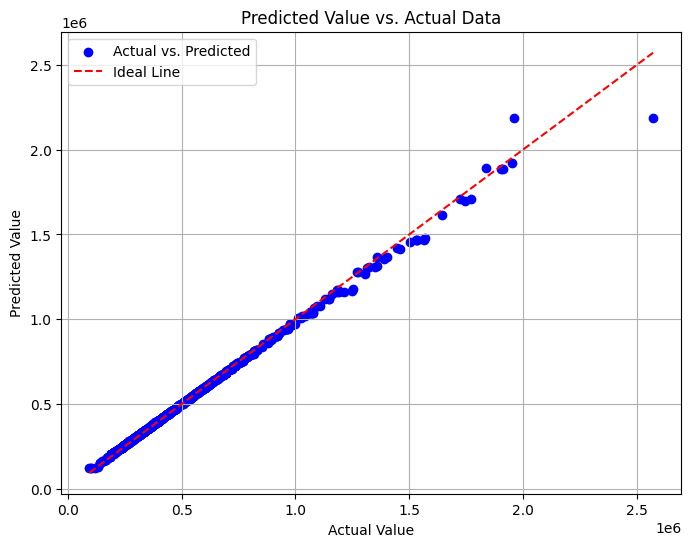

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Predicted Value vs. Actual Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

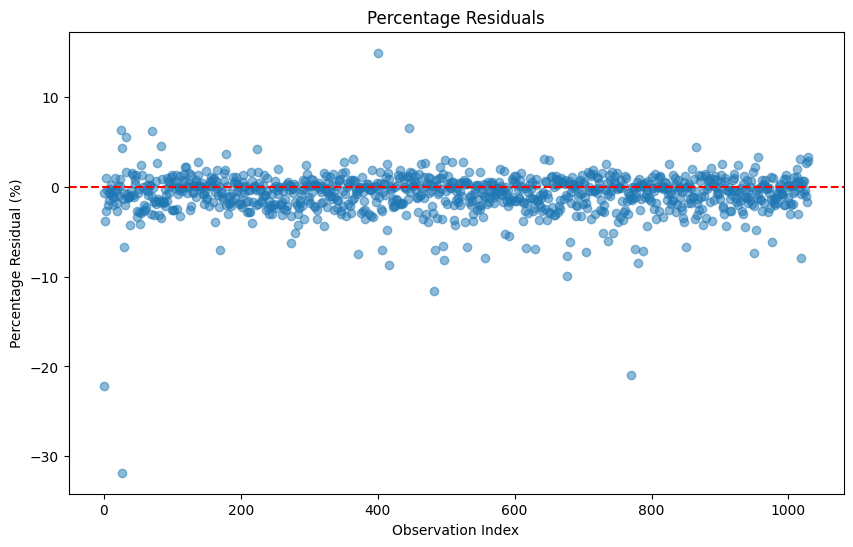

In [34]:
# Calculate percentage residuals: (Actual - Predicted) / Actual * 100
percentage_residuals = ((y_test - y_pred) / y_test) * 100

# Plotting percentage residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(percentage_residuals)), percentage_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Percentage Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Percentage Residual (%)')
plt.show()